# 데이터분석 기초스터디
# Chapter 4 : 그래프 그리기

4-1 데이터 시각화가 필요한 이유

In [2]:
import seaborn as sns

In [4]:
anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [6]:
import matplotlib.pyplot as plt

In [8]:
dataset_1 = anscombe[anscombe['dataset']=='I']

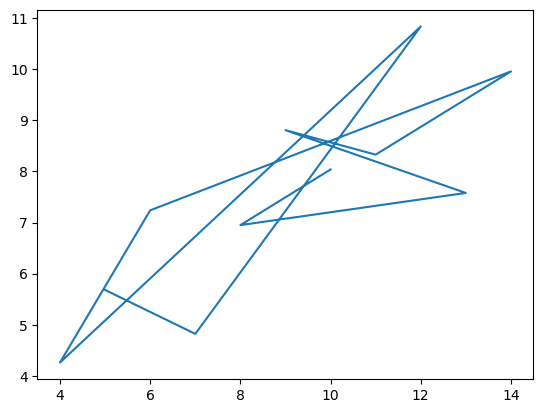

In [10]:
plt.plot(dataset_1['x'], dataset_1['y'])

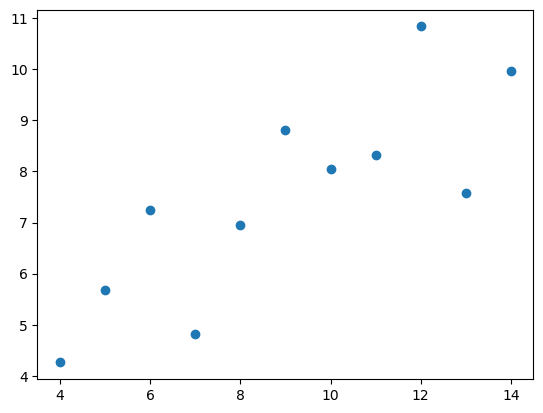

In [12]:
plt.plot(dataset_1['x'],dataset_1['y'],'o')

한 번에 4개의 그래프 그리기

In [15]:
dataset_2=anscombe[anscombe['dataset']=='II']
dataset_3=anscombe[anscombe['dataset']=='III']
dataset_4=anscombe[anscombe['dataset']=='IV']

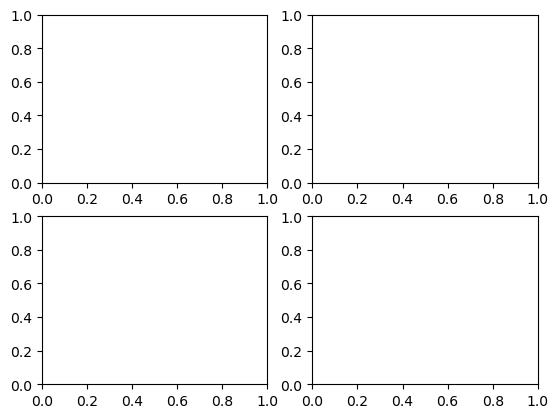

In [17]:
fig=plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

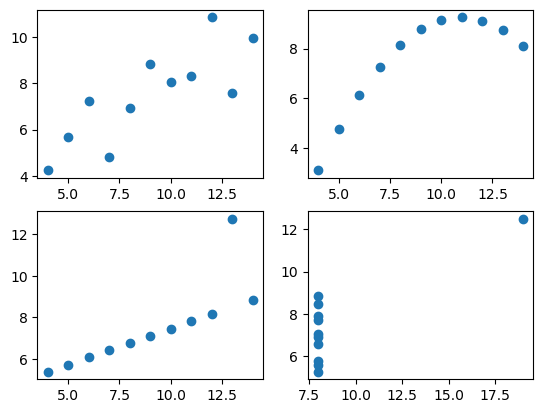

In [18]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')
fig

In [21]:
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

Text(0.5, 1.0, 'dataset_4')

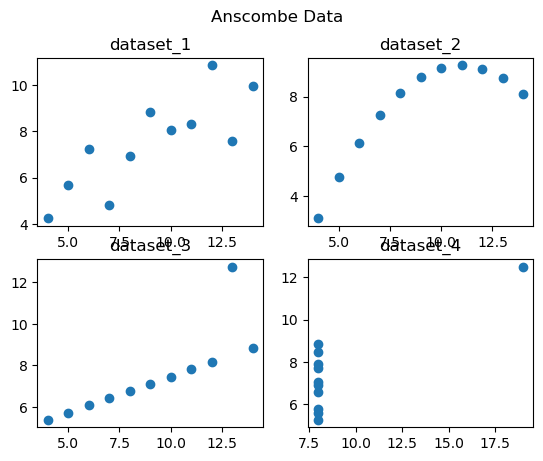

In [23]:
fig.suptitle("Anscombe Data") #제목 붙이기
fig

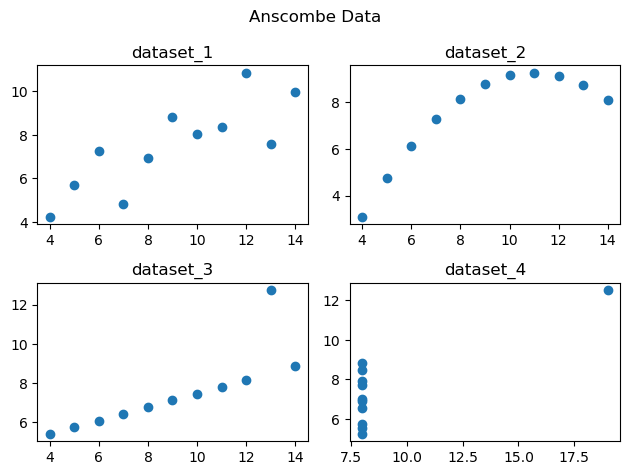

In [24]:
fig.tight_layout( )
fig

4-2 matplotlib 라이브러리 자유자재로 사용하기

In [32]:
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


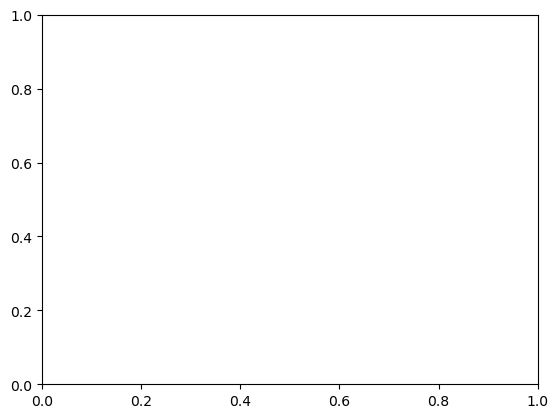

In [34]:
fig=plt.figure()
axes1=fig.add_subplot(1,1,1)

히스토그램 그리기 (hist)

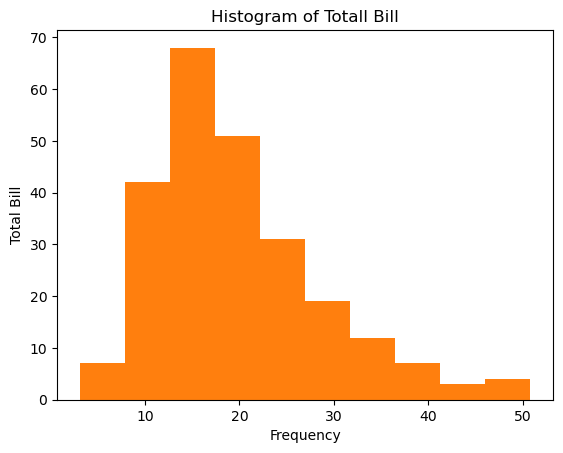

In [38]:
axes1.hist(tips['total_bill'],bins=10)
axes1.set_title('Histogram of Totall Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

산점도 그리기 (scatter)

Text(0, 0.5, 'Tip')

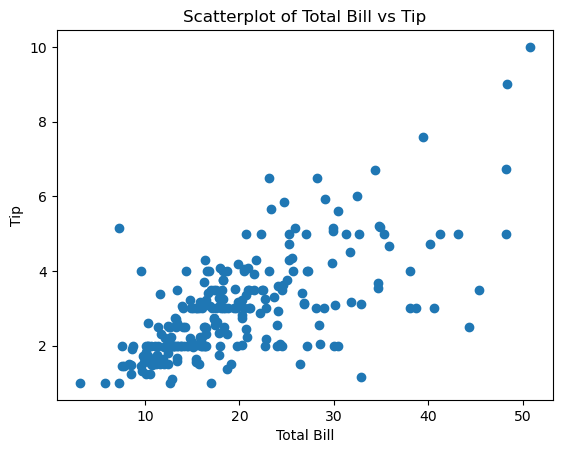

In [40]:
scatter_plot = plt.figure( )
axes1=scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'],tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

박스 그래프 그리기 (boxplot)

C:\Users\ghkdc\AppData\Local\Temp\ipykernel_13200\3919224169.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],


{'whiskers': [<matplotlib.lines.Line2D at 0x203d5dd0800>,
 'caps': [<matplotlib.lines.Line2D at 0x203d4553dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x203d45a4da0>,
 'medians': [<matplotlib.lines.Line2D at 0x203d4551c40>,
 'fliers': [<matplotlib.lines.Line2D at 0x203cee0ba40>,
 'means': []}

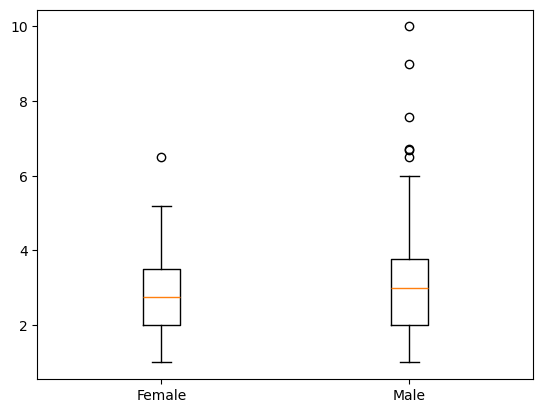

In [50]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
               tips[tips['sex'] == 'Male']['tip']],
               labels=['Female', 'Male'])

다변량 산점도 그래프 그리기

여자를 0, 남자를 1로 변환하는 함수를 생성해 tips에 새로운 열로 추가

In [53]:
def recode_sex(sex):
    if sex == 'Female' :
        return 0
    else:
        return 1

In [55]:
tips['sex_color']=tips['sex'].apply(recode_sex)

Text(0, 0.5, 'Tip')

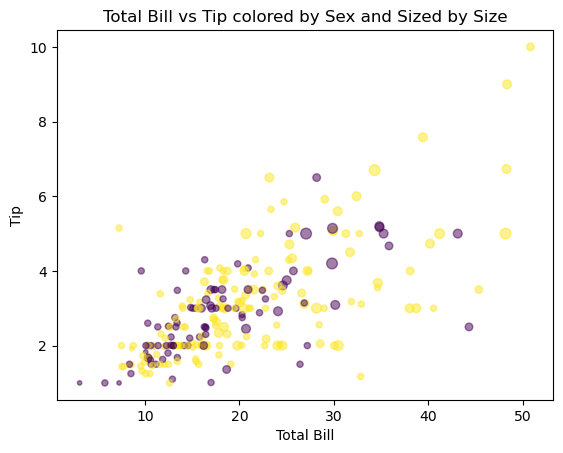

In [62]:
scatter_plot=plt.figure()
axes1=scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size']*10,
    c=tips['sex_color'],
    alpha=0.5)
axes1.set_title('Total Bill vs Tip colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

4-3 seaborn 라이브러리 자유자재로 사용하기

In [65]:
import seaborn as sns

In [88]:
tips=sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


히스토그램 그리기 (distplot)

C:\Users\ghkdc\AppData\Local\Temp\ipykernel_13200\1788522946.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'])


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

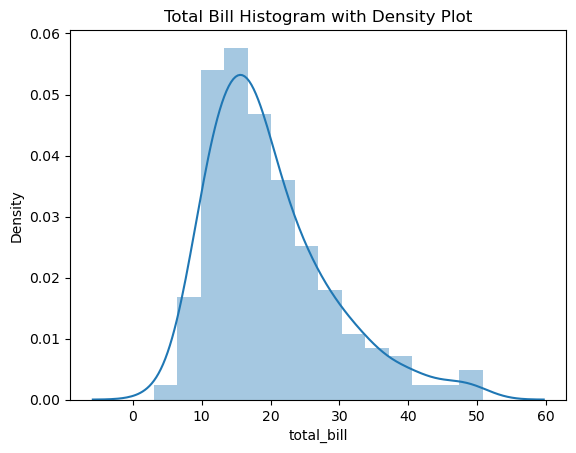

In [69]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

C:\Users\ghkdc\AppData\Local\Temp\ipykernel_13200\1683084659.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], kde = False) # 밀집도 그래프는 안 나오게 하는 법


Text(0, 0.5, 'Frequency')

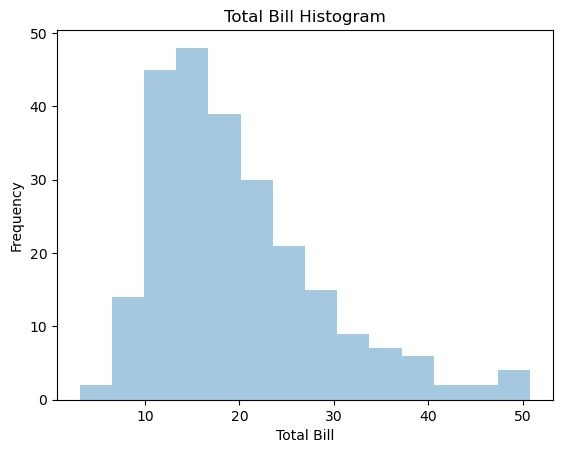

In [74]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde = False) # 밀집도 그래프는 안 나오게 하는 법
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

C:\Users\ghkdc\AppData\Local\Temp\ipykernel_13200\1924338335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(tips['total_bill'], hist=False) # 히스토그램 그래프는 안 나오게 하는 법


Text(0, 0.5, 'Unit Probability')

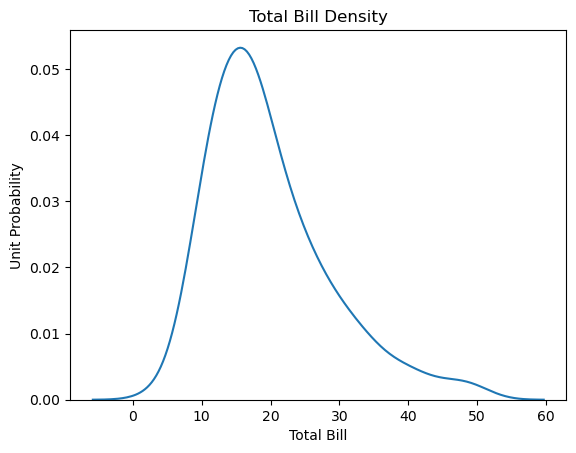

In [80]:
ax = plt.subplots()
ax=sns.distplot(tips['total_bill'], hist=False) # 히스토그램 그래프는 안 나오게 하는 법
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

양탄자 그래프까지 추가

C:\Users\ghkdc\AppData\Local\Temp\ipykernel_13200\1322018809.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], rug=True)


Text(0.5, 0, 'Total Bill')

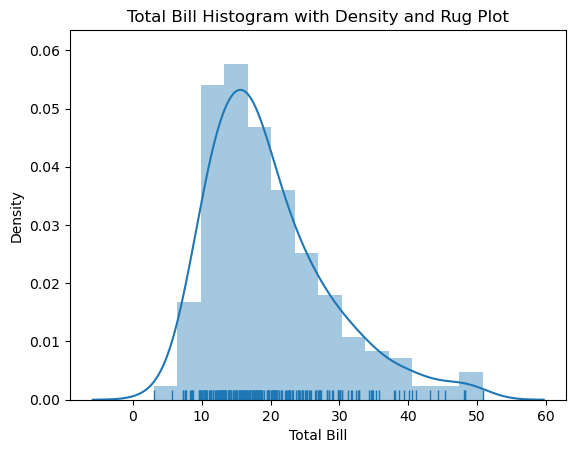

In [83]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

count 그래프 그리기

Text(0, 0.5, 'Frequency')

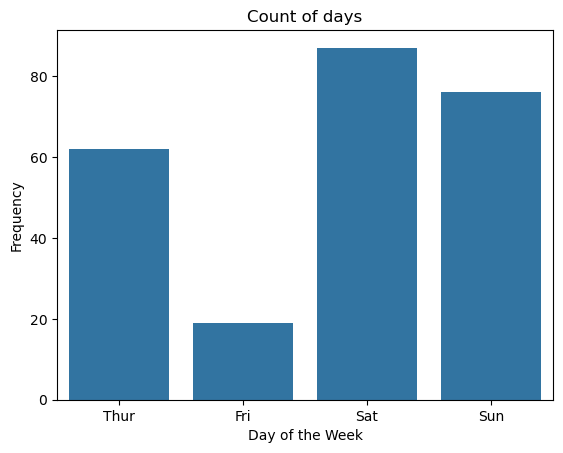

In [159]:
ax = plt.subplots()
ax = sns.countplot(x='day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

seaborn 라이브러리로 다양한 종류의 그래프 그리기

regplot 메서드를 이용해 산점도 그래프와 회귀선 같이 그리기/
fit_reg=False로 회귀선 제거 가능

Text(0, 0.5, 'Tip')

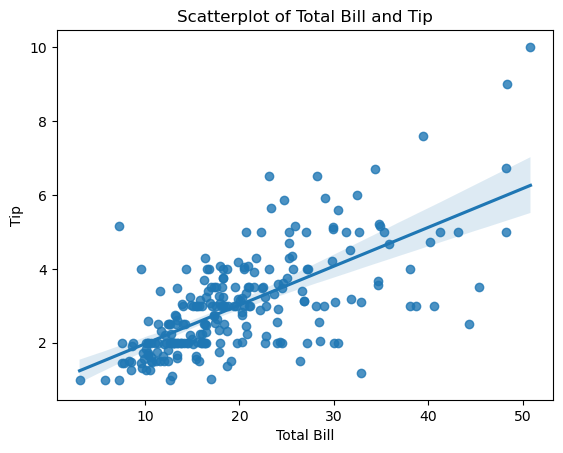

In [106]:
ax=plt.subplots()
ax = sns.regplot(x='total_bill',y='tip',data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

산점도 그래프와 히스토그램을 한 번에 그리기 (jointplot)

Text(0.5, 1.05, 'Joint Plot of Total Bill and Tip')

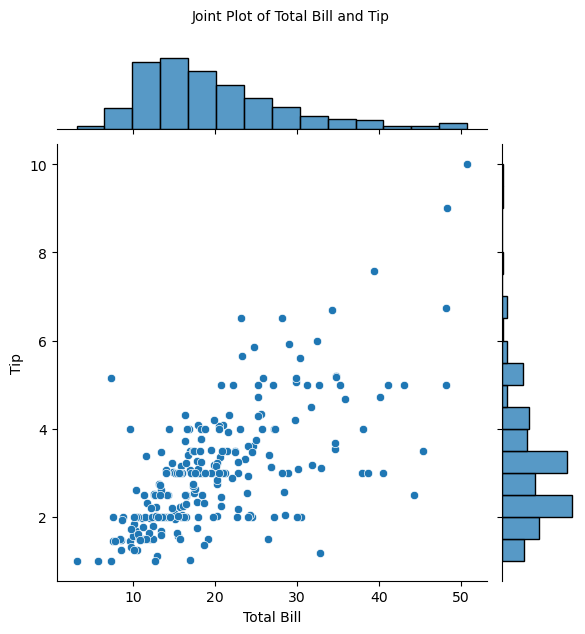

In [116]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize = 10, y=1.05)

육각 그래프 (hexxbin) / 데이터 개수가 많을수록 진해진다.

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

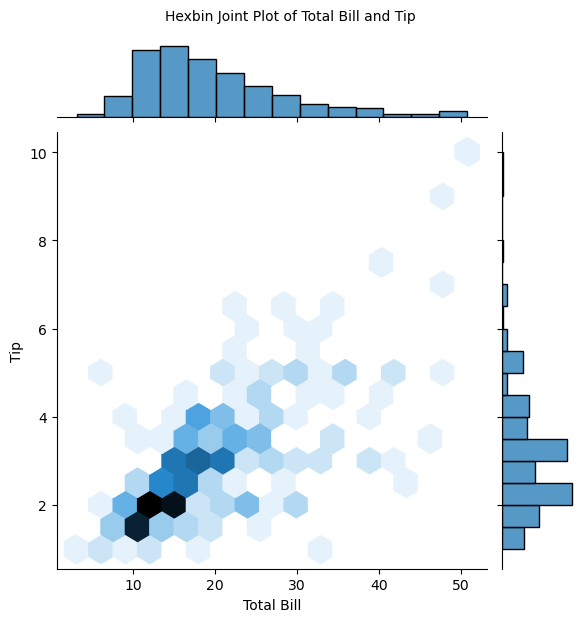

In [119]:
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

이차원 밀집도 그리기

C:\Users\ghkdc\AppData\Local\Temp\ipykernel_13200\478098250.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=tips['total_bill'],


Text(0, 0.5, 'Tip')

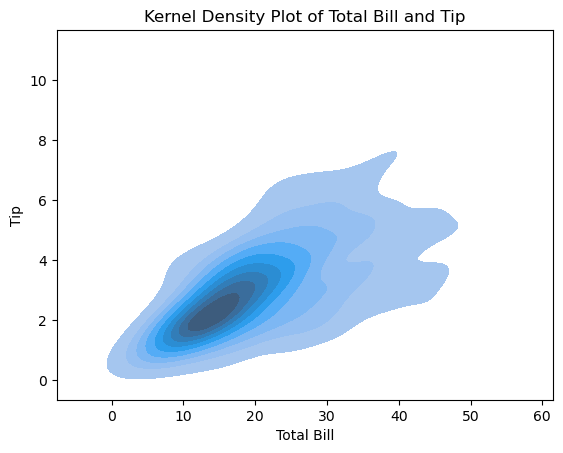

In [142]:
ax = plt.subplots( )
ax = sns.kdeplot(x=tips['total_bill'],
                 y=tips['tip'],
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

바 그래프 그리기

Text(0, 0.5, 'Average total bill')

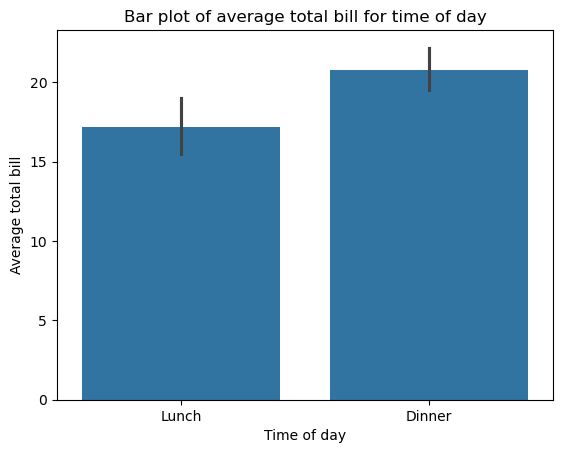

In [134]:
ax=plt.subplots()
ax=sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

박스 그래프 그리기

Text(0, 0.5, 'Total Bill')

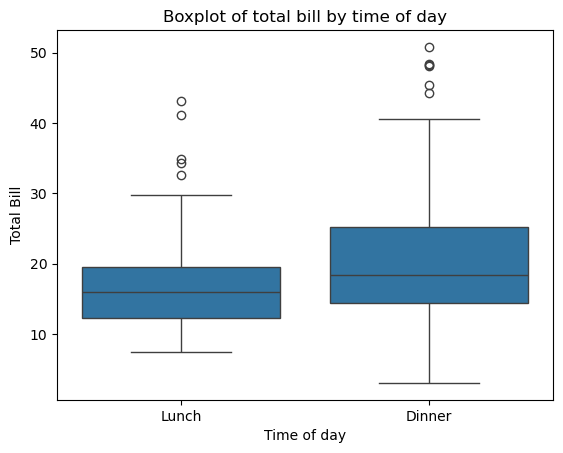

In [140]:
ax = plt.subplots( )
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

Text(0, 0.5, 'Total Bill')

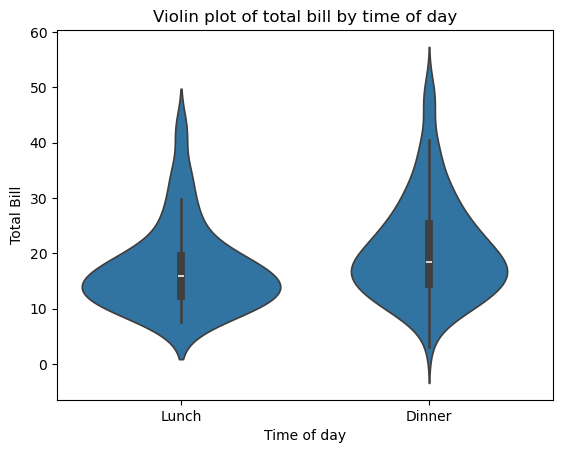

In [144]:
#바이올린 그래프
ax = plt.subplots( )
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

관계 그래프 그리기 (pairplot)

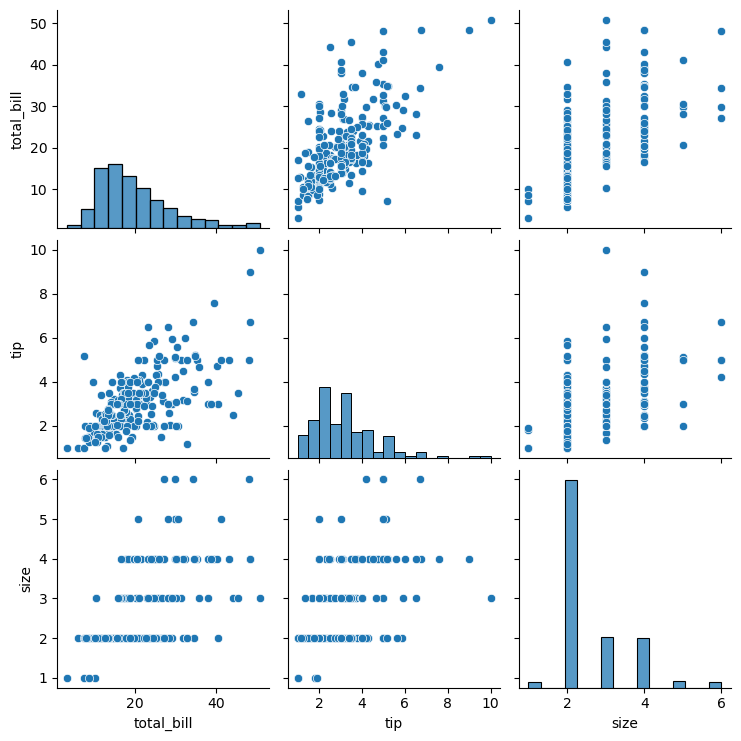

In [147]:
fig = sns.pairplot(tips)

C:\Users\ghkdc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
C:\Users\ghkdc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, colo

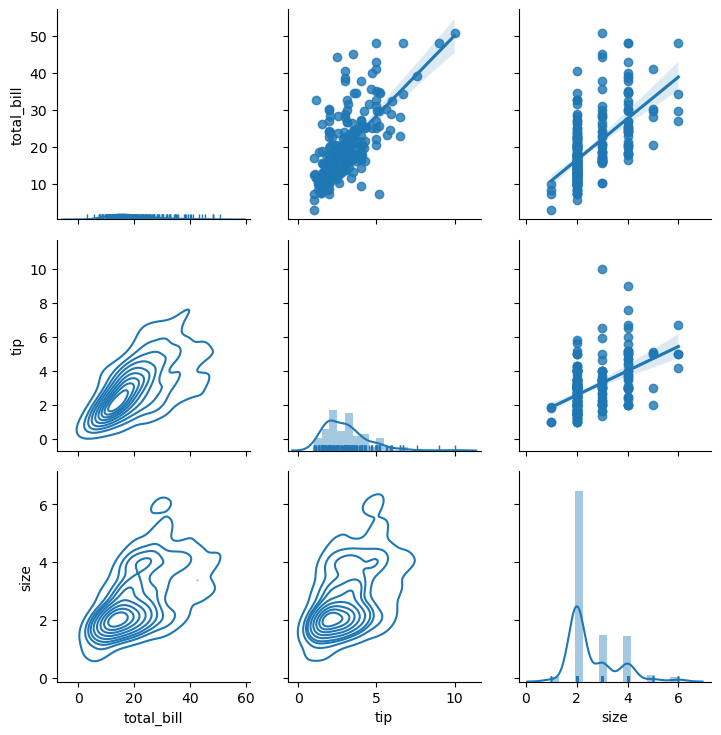

In [152]:
# 대각선을 기준으로 그릴 그래프를 정할 수 있다
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

바이올린 그래프에 색상 추가(hue)

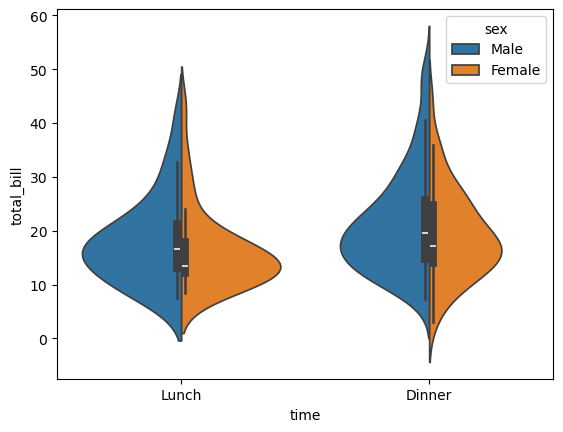

In [155]:
ax = plt.subplots( )
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

산점도, 관계 그래프에 색상 추가하기

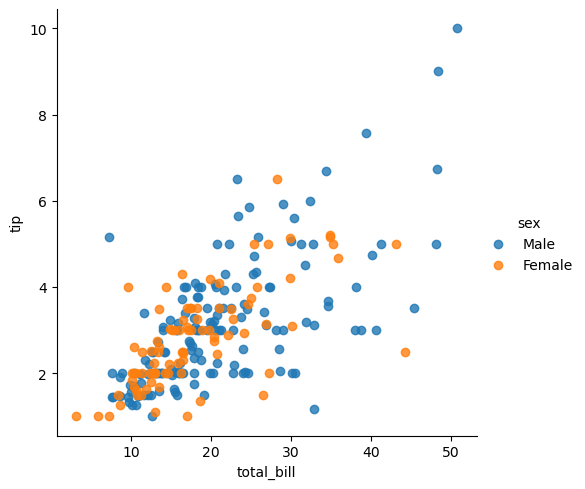

In [162]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

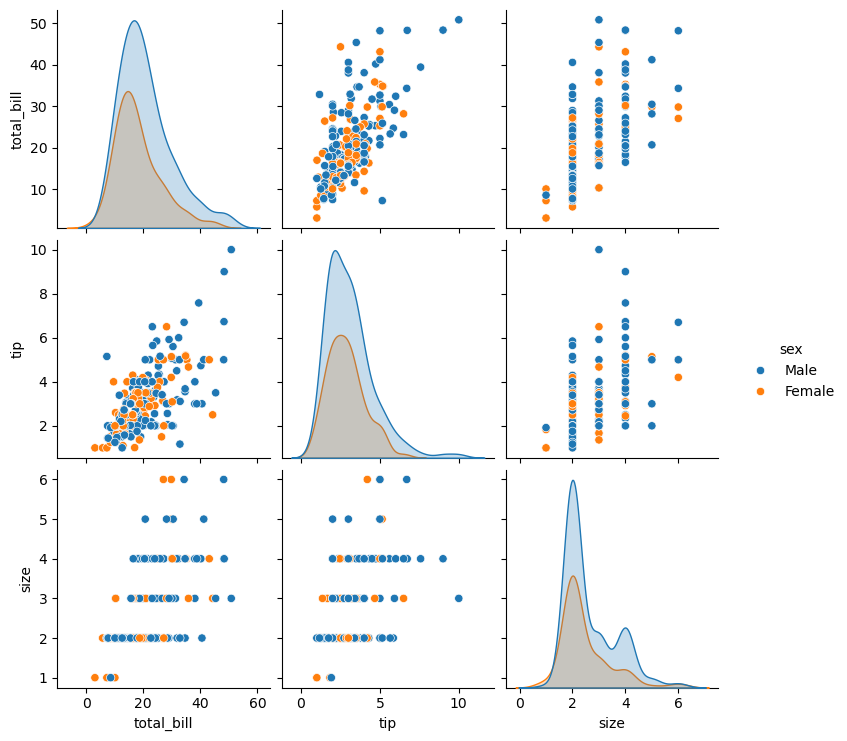

In [164]:
fig = sns.pairplot(tips, hue='sex')

산점도 그래프의 크기와 모양 조절

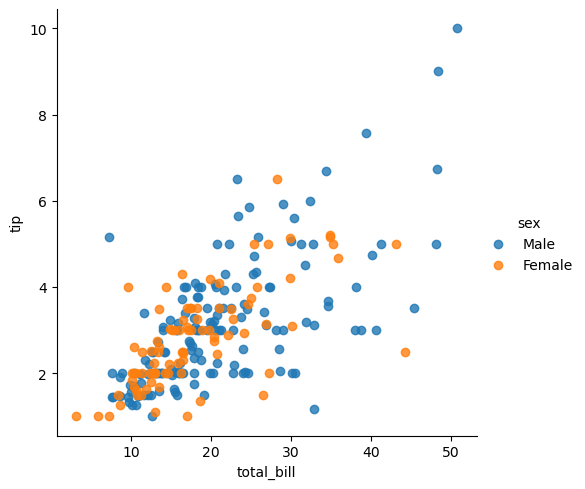

In [193]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex')

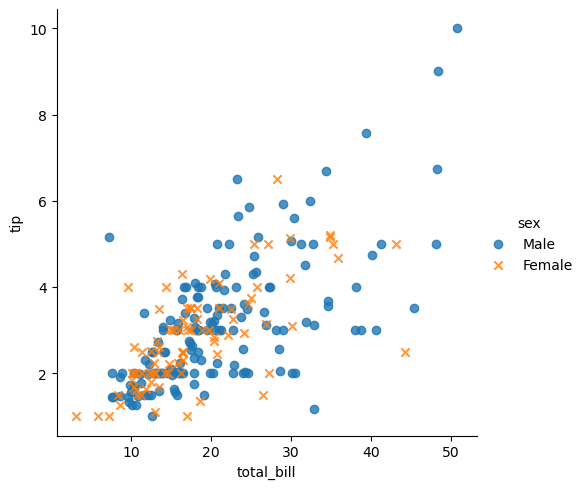

In [177]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', markers=['o','x'])

lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기

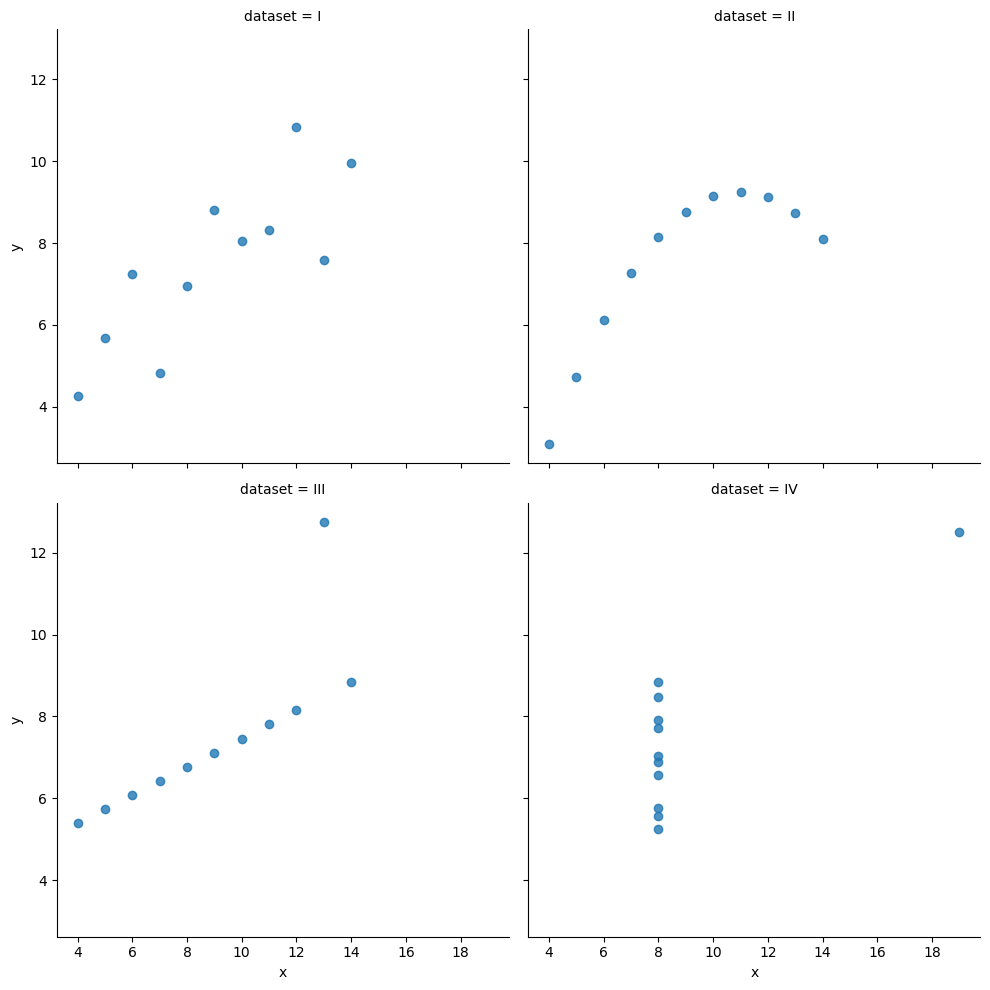

In [179]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)

FacetGrid 클래스로 그룹별 그래프 그리기

C:\Users\ghkdc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ghkdc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


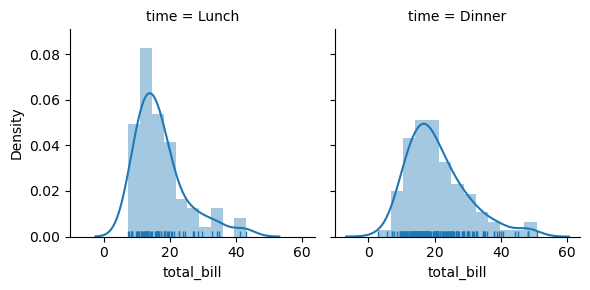

In [183]:
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

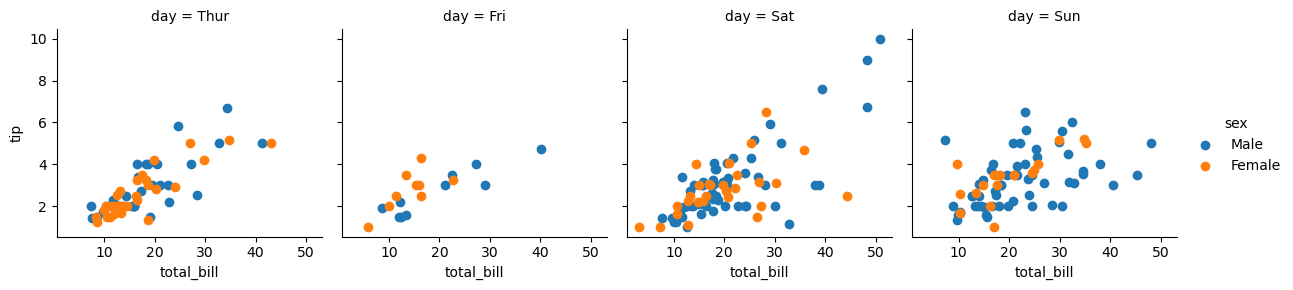

In [187]:
# 다변량 그래프 (요일 별로 나누어 보겠다 + 성별은 색깔로 구분짓기)
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend( )

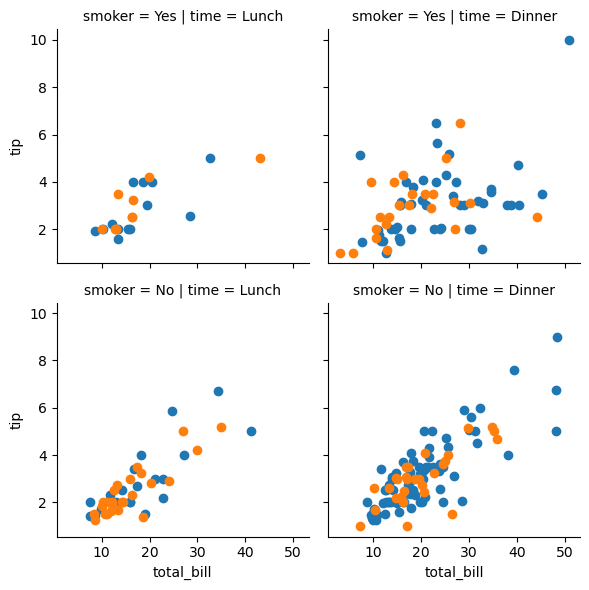

In [191]:
#열은 시간으로, 행은 흡연 유무로 구분지어 각 경우의 가격과 팁의 관계를 파악하고 싶다
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')